# Tutorial on ProfileHistogram

In [1]:
from matplotlib import pyplot as plt
import poisson_approval as pa

## Profile

Generate a random profile:

In [2]:
generator_profile = pa.GeneratorProfileHistogramUniform(n_bins = 10)
profile = generator_profile()
profile

<abc: 0.053743230902734695 [0.08966909 0.01442632 0.33096612 0.03478041 0.112998   0.01362975
 0.00338772 0.05718252 0.2578021  0.08515797], acb: 0.43336573257487954 [0.23983974 0.13086062 0.07247007 0.07282276 0.11716795 0.11523873
 0.02476115 0.22065176 0.00192119 0.00426604], bac: 0.05372144305861426 [0.30947192 0.17842114 0.06390927 0.10152159 0.10621856 0.024359
 0.06926764 0.05795415 0.041422   0.04745474], bca: 0.04438450201855593 [0.01152976 0.01649768 0.42387152 0.10146042 0.07117235 0.03755548
 0.21098342 0.10469953 0.015782   0.00644783], cab: 0.3671570451307352 [0.16232586 0.14515879 0.02036327 0.04999003 0.03815725 0.12647016
 0.02101714 0.21859768 0.02259632 0.19532348], cba: 0.047628046314480366 [1.68825297e-04 1.65869425e-01 4.00968258e-01 5.85923602e-02
 1.04515366e-01 7.78305189e-02 9.13553265e-02 4.82922403e-02
 1.32283268e-02 3.91793532e-02]> (Condorcet winner: a)

Share of each ranking:

In [3]:
profile.d_ranking_share

{abc: 0.053743230902734695, acb: 0.43336573257487954, bac: 0.05372144305861426, bca: 0.04438450201855593, cab: 0.3671570451307352, cba: 0.047628046314480366}

Distribution of the utilities for voters $abc$:

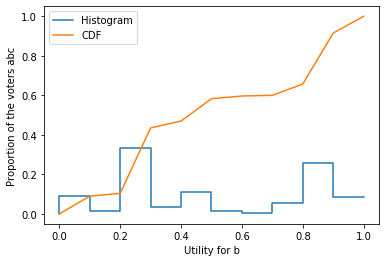

In [4]:
ranking = 'abc'
profile.plot_histogram(ranking, label='Histogram')
profile.plot_cdf(ranking, label='CDF')
plt.ylabel('Proportion of the voters %s' % ranking)
plt.legend()

## Strategic Analysis

Generate a random strategy:

In [5]:
generator_strategy = pa.GeneratorProfileStrategyThreshold()
strategy = generator_strategy()
strategy

<abc: utility-dependent (0.767686700553199), acb: utility-dependent (0.4653548493427636), bac: utility-dependent (0.9305583395615991), bca: utility-dependent (0.8660410485904834), cab: utility-dependent (0.9936925669594555), cba: utility-dependent (0.16862807660582568)>

Tau vector (ballot shares) associated to the strategy in the given profile:

In [6]:
tau = profile.tau(strategy)
tau

<a: 0.2911171254841006, ab: 0.021195128043267612, ac: 0.18109034899085097, b: 0.09581158526322212, bc: 0.0427224202282457, c: 0.36806339199031296> ==> c

Is the strategy an equilibrium for the given profile?

In [7]:
profile.is_equilibrium(strategy)

EquilibriumStatus.NOT_EQUILIBRIUM

Use iterated voting to search for an equilibrium:

In [8]:
cycle = profile.iterated_voting(strategy_ini=strategy, n_max_episodes=1000, verbose=True)

-1
<abc: utility-dependent (0.767686700553199), acb: utility-dependent (0.4653548493427636), bac: utility-dependent (0.9305583395615991), bca: utility-dependent (0.8660410485904834), cab: utility-dependent (0.9936925669594555), cba: utility-dependent (0.16862807660582568)> ==> c
0
<abc: ab, acb: a, bac: ab, bca: bc, cab: c, cba: utility-dependent (0.6784379383556463)> ==> a
1
<abc: utility-dependent (0.6149446544430428), acb: a, bac: ab, bca: bc, cab: c, cba: utility-dependent (0.38505534555695725)> ==> a
2
<abc: utility-dependent (0.5458788769161699), acb: a, bac: ab, bca: bc, cab: c, cba: utility-dependent (0.45412112308383)> ==> a
3
<abc: utility-dependent (0.5514296994759739), acb: a, bac: ab, bca: bc, cab: c, cba: utility-dependent (0.4485703005240261)> ==> a
4
<abc: utility-dependent (0.5509261223033161), acb: a, bac: ab, bca: bc, cab: c, cba: utility-dependent (0.44907387769668394)> ==> a
5
<abc: utility-dependent (0.5509717624313708), acb: a, bac: ab, bca: bc, cab: c, cba: util

In [9]:
cycle

[<abc: utility-dependent (0.5509679694096747), acb: a, bac: ab, bca: bc, cab: c, cba: utility-dependent (0.4490320305903252)> ==> a]

In [10]:
if len(cycle) == 0:
    print('No convergence.')
elif len(cycle) == 1:
    print('Convergence to an equilibrium: %s.' % cycle[0])
else:
    print('Convergence to a cycle of cardinality %s.' % len(cycle))

Convergence to an equilibrium: <abc: utility-dependent (0.5509679694096747), acb: a, bac: ab, bca: bc, cab: c, cba: utility-dependent (0.4490320305903252)> ==> a.
